# Bias and Variance
---

<a id="learning-objectives"></a>
### Learning Objectives
- Define error due to bias and error due to variance.
- Identify the bias-variance trade-off.
- Describe what overfitting and underfitting means in the context of model building.
- Explain problems associated with over- and underfitting.

### Lesson Guide
- [Bias and Variance Trade-Off](#bias-and-variance-trade-off)
	- [Bias? Variance?](#bias-variance)
	- [Exploring the Bias-Variance Trade-Off](#exploring-the-bias-variance-tradeoff)
	- [Brain and Body Weight Mammal Data Set](#brain-and-body-weight-mammal-dataset)
	- [Making a Prediction](#making-a-prediction)
- [Making a Prediction From a Sample](#making-a-prediction-from-a-sample)
	- [Low bias, high variance model](#lets-try-something-completely-different)
- [Balancing Bias and Variance](#balancing-bias-and-variance)
	- [Additional Resources](#additional-resources)

<a id="bias-and-variance-trade-off"></a>
## Bias and Variance Trade-Off
---

The **bias-variance tradeoff** is widely used in machine learning as a conceptual way of comparing and contrasting different models. 

**Bias** is error stemming from incorrect model assumptions.
- Example: Assuming data is linear when it has a more complicated structure.

**Variance** is error stemming from being overly sensitive from changes to the training data.
- Example: Trying to model the training set exactly for a model results in a completely different model -- even if the training set differs only slightly.


As model complexity **increases**:
- Bias **decreases**. (The model can more accurately model complex structure in data.)
- Variance **increases**. (The model identifies more complex structures, making it more sensitive to small changes in the training data.)

<a id="bias-variance"></a>
### Bias? Variance?

**Conceptual Definitions**
- **Bias**: How close are predictions to the actual values?
  - Roughly, whether or not our model aims on target.
  - If the model cannot represent the data's structure, our predictions could be consistent, but will not be accurate.
- **Variance**: How will our predictions vary on different datasets?
  - Roughly, whether or not our model is reliable.
  - We will make slightly different predictions given slightly different training sets.

<img alt="Estimating coefficients" src="https://drive.google.com/uc?export=view&id=1_Fsiha1kPelWbj1LVoVcwEGfEz5WQGVc">

- Visually, we are building a model where the bulls-eye is the goal.
- Each individual hit is one prediction based on our model.
- Critically, the success of our model (low variance, low bias) depends on the training data present.

**Examples:**

- **Linear regression:** Low variance, High bias.
    - If we train with a different subset of the training set, the model will be about the same. Hence, the model has low variance.
    - The resulting model will predict the training points incorrectly (unless they happen to be perfectly linear). Hence, it has high bias.
   

- **1-Nearest neighbor:** High variance, Low bias.
    - If we train with a different subset of the training set, the model will make predictions very differently. Hence, the model is highly variable.
    - The resulting model will predict every training point perfectly. Hence, it has low bias.

- **K-Nearest neightbor:** Med-high variance, Med-low bias.
    - The model itself is more robust to outliers, so it will make more predictions the same than before. Hence, it has lower variance than 1-NN.
    - The resulting model no longer predicts every point perfectly, since outliers will be mispredicted. So, the bias will be higher than before.

**Expressing bias and variance mathematically:**

It can be helpful understanding these terms by looking at how we can decompose the total error into them mathematically. (We will skip the derivations for now!)

Let's define the error of our predictor as the expected value of our squared error. Note this error is not based on any particular fitted model, but on the family of potential models given a dataset (i.e. all fitted models made from all possible subsets of data).

$$E[(y - \hat{f}(x))^2] = Bias[\hat{f}(x)]^2 + Var[\hat{f}(x)] + \sigma^2$$

This states the expected error is based on only three components: **bias**, **variance**, and **irreducible error**.

Breaking the bias and variance down further:

$$Bias[\hat{f}(x)] = E[\hat{f}(x) - f(x)].$$

- The bias is just the average expected distance between our predictor and actual values.

$$Var[\hat{f}(x)] = E[\hat{f}(x)^2] - E[\hat{f}(x)]^2.$$

- The variance is how much our predictions vary about the mean. ($E[\hat{f}(x)]$ is our predictor's mean prediction.)

- The irreducible error stems from noise in the problem itself.

**Some common questions:**

From the math above, we can answer a few common questions:

Can a model have high bias given one dataset and low bias for another?
- Yes. If our data is linearly related, for example, it will have low bias on a linear model! However, in general across all datasets very few are accurately described with a linear model. So, in general we say a linear model has high bias and low variance.

Is the MSE for a fitted linear regression the same thing as the bias?
- It's close, but bias does not apply to a specific fitted model. Bias is the expected error of a model no matter what subset of the data it is fit on. This way, if we happen to get a lucky MSE fitting a model on a particular subset of our data, this does not mean we will have a low bias overall.

<a id="exploring-the-bias-variance-tradeoff"></a>
### Exploring the Bias-Variance Trade-Off

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Allow plots to appear in the notebook.
%matplotlib inline

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1BKe_Wsc5t0t--bI8vRw2EmIGcIVlnXg0'}) # replace the id with id of file you want to access
downloaded.GetContentFile('mammals.txt')

<a id="brain-and-body-weight-mammal-dataset"></a>
### Brain and Body Weight Mammal Data Set

This is a [data set](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body (in kg) and the brain (in g) for 62 mammal species. We'll use this dataset to investigate bias vs. variance. Let's read it into Pandas and take a quick look:

In [4]:
path = 'mammals.txt'
cols = ['brain','body']
mammals = pd.read_table(path, sep='\t', names=cols, header=0)
mammals.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


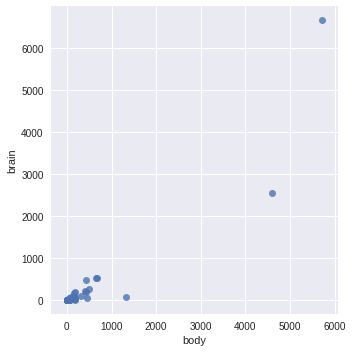

In [6]:
sns.lmplot(x='body', y='brain', data=mammals, fit_reg=False);

There appears to be quite a few outliers.   
We're going to focus on a smaller subset in which the body weight is less than 200 kg.

In [7]:
# Only keep rows in which the body weight is less than 200 kg.
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

We're now going to pretend that there are only 51 mammal species in existence. In other words, we are pretending that this is the entire data set of brain and body weights for **every known mammal species**.

Let's create a scatterplot (using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/)) to visualize the relationship between brain and body weight:

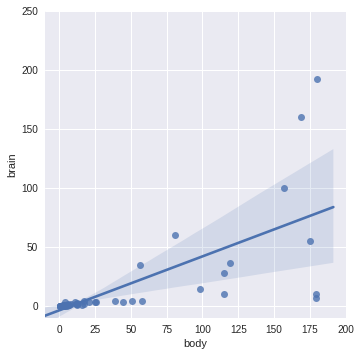

In [16]:
sns.lmplot(x='body', y='brain', data=mammals, fit_reg=True);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

There appears to be a relationship between brain and body weight for mammals.

<a id="making-a-prediction"></a>
### Making a Prediction

<a id="linear-regression-quick-review"></a>
#### Linear Regression: A Quick Review

![](./assets/linear-residuals.png)

Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species we can find and calculate an **average body weight of 100 kgs**. We want to **predict the average brain weight** of this species (rather than measuring it directly). How might we do this?

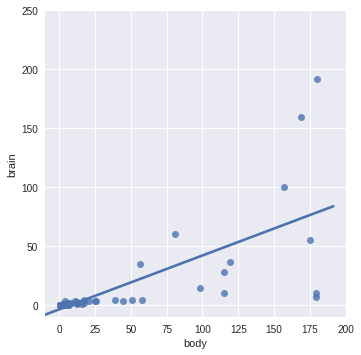

In [9]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

We drew a straight line that appears to best capture the relationship between brain and body weight. So, we might predict that our new species has a brain weight of about 45 g, as that's the approximate y value when x=100.

This is known as a "linear model" or a "linear regression model."

<a id="making-a-prediction-from-a-sample"></a>
## Making a Prediction From a Sample

Earlier, we assumed that this dataset contained every known mammal species. That's very convenient, but **in the real world, all you ever have is a sample of data**. This may sound like a contentious statement, but the point of machine learning is to generalize from a sample to the population. If you already have data for the entire population, then you have no need for machine learning -- you can apply statistics directly and get optimal answers!

Here, a more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.

When that new mammal species (with a body weight of 100 kg) is discovered, we still want to make an accurate prediction for its brain weight, but this task might be more difficult, as we don't have all of the data we would ideally like to have.

Let's simulate this situation by assigning each of the 51 observations to **either universe 1 or universe 2**:

In [10]:
# Set a random seed for reproducibility.
np.random.seed(12345)

# Randomly assign every observation to either universe 1 or universe 2.
mammals['universe'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,brain,body,universe
0,3.385,44.5,1
1,0.480,15.5,2
2,1.350,8.1,2
4,36.330,119.5,2
5,27.660,115.0,1


**Important:** We only live in one of the two universes (one sample dataset made available to us at a time). Two samples combined (both universes) have 51 known mammal species, but each universe(sample) only knows the brain and body weight of a group of species.

We can now use Seaborn to create two plots in which the left plot only uses the data from **universe 1** and the right plot only uses the data from **universe 2**:

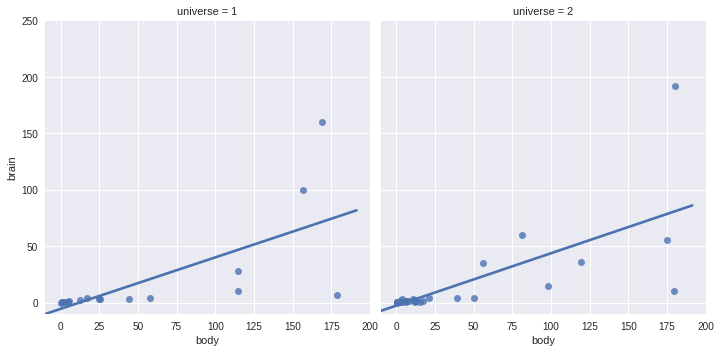

In [11]:
# col='universe' subsets the data by universe and creates two separate plots.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data. In both cases, we would predict a brain weight of about 45 g.

It's easier to see the degree of similarity by placing them on the same plot:

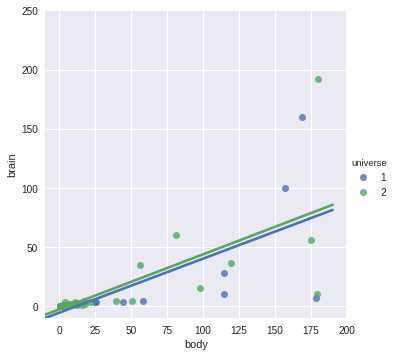

In [12]:
# hue='universe' subsets the data by universe and creates a single plot.
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe');
plt.xlim(-10, 200);
plt.ylim(-10, 250);

So, what was the point of this exercise? This was a visual demonstration of a high-bias, low-variance model.

- It's **high bias** because both models (straight lines) don't fit the data particularly well.
- It's **low variance** because the model (the straight line) doesn't change much depending on which observations happen to be available in that universe.

<a id="lets-try-something-completely-different"></a>
### Low bias, high variance model

What would a **low bias, high variance** model look like? Let's try polynomial regression with an eighth-order polynomial.

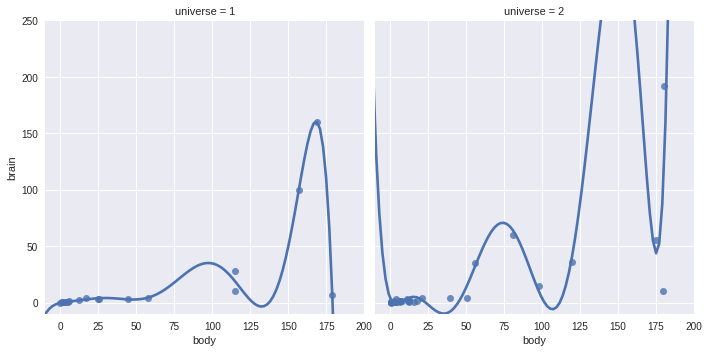

In [22]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

- It's **low bias** because the models match the data effectively.
- It's **high variance** because the models are widely different, depending on which observations happen to be available in that universe. (For a body weight of 100 kg, the brain weight prediction would be 40 kg in one universe and 0 kg in the other!)

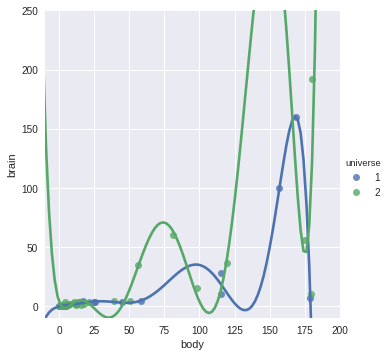

In [14]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe', order=8);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

<a id="balancing-bias-and-variance"></a>
## Balancing Bias and Variance
Can we find a middle ground?

Perhaps we can create a model that has **less bias than the linear model** and **less variance than the eighth order polynomial**?

Let's try a second order polynomial instead:

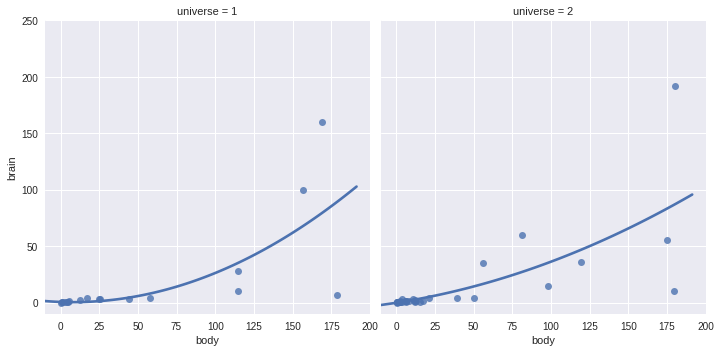

In [15]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=2);
plt.xlim(-10, 200);
plt.ylim(-10, 250);

This seems better. In both the left and right plots, **it fits the data well, but not too well**.

This is the essence of the **bias-variance trade-off**: You are seeking a model that appropriately balances bias and variance and thus will generalize to new data (known as "out-of-sample" data).

We want a model that best balances bias and variance. It
should match our training data well (moderate bias) yet be low variance for out-of-sample data (moderate variance).

- Training error as a function of
complexity.
- Question: Why do we even
care about variance if we
know we can generate a
more accurate model with
higher complexity?

![Bias-variance tradeoff](./assets/bias_variance.png)

### Can we obtain a zero-bias, zero-variance model?

No! If there is any noise in the data-generating process, then a zero-variance model would not be learning from the data. Additionally, a model only has zero bias if the true relationship between the target and the features is hard-coded into it. If that were the case, you wouldn't be doing machine learning -- it would be similar to trying to predict today's temperature by using today's temperature!

<a id="additional-resources"></a>
### Additional Resources
- [Bias Variance](http://scott.fortmann-roe.com/docs/BiasVariance.html)